# IOU

In [9]:
import numpy as np

In [14]:
# 定义方法计算IOU
def IOU(box1,box2,wh=False):
    # 判断表示方式
    if wh == False:
        # 极坐标表示
        xmin1,ymin1,xmax1,ymax1 = box1
        xmin2,ymin2,xmax2,ymax2 = box2
    else:
        # 中心点坐标表示
        # 第一框
        xmin1,ymin1 = int(box1[0]-box1[2]/2.0),int(box1[1]-box1[3]/2.0)
        xmax1,ymax1 = int(box1[0]+box1[2]/2.0),int(box1[1]+box1[3]/2.0)
        # 第二框
        xmin2,ymin2 = int(box2[0]-box2[2]/2.0),int(box2[1]-box2[3]/2.0)
        xmax2,ymax2 = int(box2[0]+box2[2]/2.0),int(box2[1]+box2[3]/2.0)
    # 获取交集的左上角和右下角坐标
    xx1 = np.max([xmin1,xmin2])
    yy1 = np.max([ymin1,ymin2])
    xx2 = np.min([xmax2,xmax1])
    yy2 = np.min([ymax1,ymax2])
    # 计算交集面积
    inter_area = (np.max([0,xx2-xx1]))*(np.max([0,yy2-yy1]))
    # 计算并的面积
    area1 = (xmax1-xmin1)*(ymax1-ymin1)
    area2 = (xmax2-xmin2)*(ymax2-ymin2)
    uion_area = area1+area2-inter_area
    # IOU
    IOU = inter_area/(uion_area+1e-6)
    return IOU

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [6]:
# 真实框 预测框
true_box = [100,35,398,400]
pre_box = [40,150,355,398]

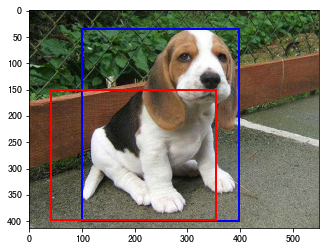

In [7]:
# 将框绘制在图像上
img = plt.imread("dog.jpeg")
fig = plt.imshow(img)
# 将真实框和预测框绘制在图像上
fig.axes.add_patch(plt.Rectangle((true_box[0],true_box[1]),width=true_box[2]-true_box[0],height=true_box[3]-true_box[1],fill=False,edgecolor="blue",linewidth=2))
fig.axes.add_patch(plt.Rectangle((pre_box[0],pre_box[1]),width=pre_box[2]-pre_box[0],height=pre_box[3]-pre_box[1],fill=False,edgecolor="red",linewidth=2))

In [15]:
IOU(true_box,pre_box)

0.5114435907762924

# NMS

In [17]:
def nms(boxes,score,thre):
    # 容错处理
    if len(boxes)==0:
        return [],[]
    # 类型转换
    # box是使用极坐标
    boxes = np.array(boxes)
    score = np.array(score)
    # 获取左上角和右下角坐标
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]
    # 计算面积
    areas = (x2-x1)*(y2-y1)
    # NMS 
    picked_boxes = []
    picked_score = []
    # 排序:小->大
    order = np.argsort(score)
    while order.size>0:
        # 获取score最大的索引
        index = order[-1]
        # 保留下来
        picked_boxes.append(boxes[index])
        picked_score.append(score[index])
        # 计算IOU
        # 交的面积
        x11 = np.maximum(x1[index],x1[order[:-1]])
        y11 = np.maximum(y1[index],y1[order[:-1]])
        x22 = np.minimum(x2[index],x2[order[:-1]])
        y22 = np.minimum(y2[index],y2[order[:-1]])
        w = np.maximum(0.0,x22-x11)
        h = np.maximum(0.0,y22-y11)
        inter_area = w*h
        # 交并比
        iou = inter_area/(areas[index]+areas[order[:-1]]-inter_area)
        # 删除冗余框
        keep_boxes =np.where(iou<thre)
        # 更新order
        order = order[keep_boxes]
        
    return picked_boxes,picked_score    

In [23]:
bounding = [(187, 82, 337, 317), (150, 67, 305, 282), (246, 121, 368, 304)]
confidence_score = [0.9, 0.65, 0.8]
threshold = 0.3

In [24]:
box,score = nms(bounding,confidence_score,threshold)

In [25]:
box

[array([187,  82, 337, 317])]

In [26]:
score

[0.9]